## Use Decision Tree for forcast IMOEX price
### Vol 5
#### 18.06.19

In [1]:
# connecting nessesary paceges
from pandas import read_csv as read
from pandas import DataFrame as DF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
from IPython.display import HTML
style = "<style>svg{width:80% !important;height:80% !important;}</style>"
HTML(style)

## Helpfull functions

In [2]:
# Result of strategy
def results(data, finish, start, clf, y_columns='MOEX_1'):
    result = []
    fact = []
    while finish <= len(data)-3:
        train = data.iloc[start:finish, :]
        x = train.drop(y_columns, axis=1)
        y = train[y_columns]
        clf.fit(x, y)
        x_test = data.iloc[finish+1:finish+2, :].drop(y_columns,axis=1)
        result.append(int(clf.predict(x_test)))
        fact.append(int(data.iloc[finish+1:finish+2, :].MOEX_1))
        start += 1
        finish += 1
    share = 0
    for i in range(len(result)):
        if result[i] == fact[i]:
            share += 1
    return share / len(result)

## In this part we try decision tree on more data
### For each piece of data, we calculate the proportion of correctly guessed values

In [3]:
git_dir = 'https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/'
data_10_sec = ['export_Index_10_10.06.txt',
              'export_Index_10_13.06.txt',
              'export_Index_10_14.06.txt',
              'export_Index_10_17.06.txt',
              'export_Index_10_18.06.txt']
data_1_min = ['export_Index_min_07.06.txt',
             'export_Index_min_10.06.txt',
             'export_Index_min_17.06.txt',
             'export_Index_min_18.06.txt']

In [4]:
hits = DF()

In [5]:
for dat in data_10_sec:
    link = str(git_dir + dat)
    print(link)
    data = pd.read_csv(link, error_bad_lines=False)
    data = data.drop('Time', axis=1)
    data.index = range(len(data))
    data['MOEX_1'] = data.MOEX.shift(-1) # let's try to predict one step forward
    data['MOEX_1'] = DF(data['MOEX_1']).apply(lambda x: np.log(x) - np.log(x).shift(1))
    data.dropna(inplace=True)
    data['MOEX_1'] = data['MOEX_1'].apply(lambda x: 1 if x > 0 else 0) # Change data tipe to boolean type
    data = data.drop(['MOEX'], axis=1) 
    steps = []
    res = []
    for step in range(10, 200, 10):
        steps.append(step)
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
        start = 0
        finish = start + step
        res.append(results(data, finish, start, clf, y_columns='MOEX_1'))
    hits[dat] = res
hits.index = steps

https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/export_Index_10_10.06.txt
https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/export_Index_10_13.06.txt
https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/export_Index_10_14.06.txt
https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/export_Index_10_17.06.txt
https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/export_Index_10_18.06.txt


In [6]:
hits.columns = ['Test_' + str(i) for i in range(len(hits.columns))]
hits.head()

,Test_0,Test_1,Test_2,Test_3,Test_4
10,0.723404,0.697693,0.695238,0.679304,0.672047
20,0.724384,0.705929,0.697494,0.673010,0.673123
30,0.714972,0.717383,0.707094,0.678363,0.686508
40,0.741727,0.719826,0.717241,0.684149,0.687649
50,0.749390,0.723083,0.718707,0.680943,0.702400


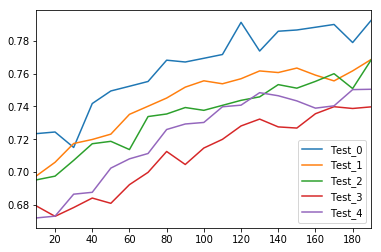

In [7]:
hits.plot()

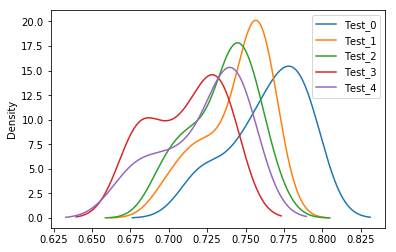

In [8]:
hits.plot.kde()

## Let's make the same calculation for minute frames

In [9]:
hits_min = DF()

In [10]:
for dat in data_1_min:
    link = str(git_dir + dat)
    print(link)
    data = pd.read_csv(link, error_bad_lines=False)
    data = data.drop('Time', axis=1)
    data.index = range(len(data))
    data['MOEX_1'] = data.MOEX.shift(-1) # let's try to predict one step forward
    data['MOEX_1'] = DF(data['MOEX_1']).apply(lambda x: np.log(x) - np.log(x).shift(1))
    data.dropna(inplace=True)
    data['MOEX_1'] = data['MOEX_1'].apply(lambda x: 1 if x > 0 else 0) # Change data tipe to boolean type
    data = data.drop(['MOEX'], axis=1) 
    steps = []
    res = []
    for step in range(10, 200, 10):
        steps.append(step)
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
        start = 0
        finish = start + step
        res.append(results(data, finish, start, clf, y_columns='MOEX_1'))
    hits_min[dat] = res
hits_min.index = steps
hits_min.columns = ['Test_' + str(i) for i in range(len(hits_min.columns))]
hits_min.head()

https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/export_Index_min_07.06.txt
https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/export_Index_min_10.06.txt
https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/export_Index_min_17.06.txt
https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/export_Index_min_18.06.txt


,Test_0,Test_1,Test_2,Test_3
10,0.508721,0.521951,0.511905,0.491525
20,0.502994,0.480000,0.502439,0.523573
30,0.598765,0.528205,0.487500,0.491094
40,0.531847,0.560526,0.497436,0.530026
50,0.562500,0.562162,0.557895,0.490617


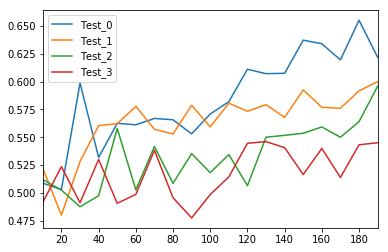

In [11]:
hits_min.plot()

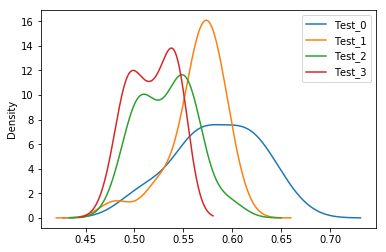

In [12]:
hits_min.plot.kde()

## As we can see. Decision tree work better wich frame 10 sec 

## Calculate mean and standart deviviation for each part with frame 10 seconds 

In [13]:
means = []
sd = []
for dat in data_10_sec:
    link = str(git_dir + dat)
    print(link)
    data = pd.read_csv(link, error_bad_lines=False)
    data = data.drop('Time', axis=1)
    data.index = range(len(data))
    data['MOEX_1'] = data.MOEX.shift(-1) # let's try to predict one step forward
    data['MOEX_1'] = DF(data['MOEX_1']).apply(lambda x: np.log(x) - np.log(x).shift(1))
    data.dropna(inplace=True)
    means.append(np.mean(data['MOEX_1']))
    sd.append(np.std(data['MOEX_1']))

https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/export_Index_10_10.06.txt
https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/export_Index_10_13.06.txt
https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/export_Index_10_14.06.txt
https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/export_Index_10_17.06.txt
https://raw.githubusercontent.com/Aurilino/Python/master/Decision%20Tree%20IMOEX/testing_data/export_Index_10_18.06.txt


In [40]:
a = hits.tail(1).T
a.columns = ['hit_chace']
a['Mean'] = means
a['SD'] = sd
a.head()

,hit_chace,Mean,SD
Test_0,0.792470,0.000002,0.000108
Test_1,0.768616,0.000002,0.000128
Test_2,0.768395,-0.000001,0.000142
Test_3,0.739709,0.000001,0.000154
Test_4,0.750424,0.000002,0.000138


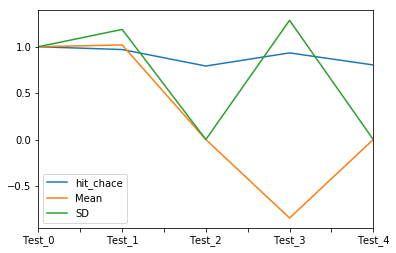

In [41]:
for i in range(1, len(a.index)):
    a.iloc[i, 0] = a.iloc[i, 0]  / a.iloc[i-1, 0]
    a.iloc[i, 1] = a.iloc[i, 1]  / a.iloc[i-1, 1]
    a.iloc[i, 2] = a.iloc[i, 2]  / a.iloc[i-1, 2]
a.iloc[0, :] = 1
a.plot()

In [49]:
import sklearn.linear_model as lm
import statsmodels.api as sm
x = a.drop('hit_chace', axis=1)
y = a.hit_chace

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

c:\python37-32\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:              hit_chace   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     22.03
Date:                Thu, 20 Jun 2019   Prob (F-statistic):             0.0434
Time:                        22:17:50   Log-Likelihood:                 13.020
No. Observations:                   5   AIC:                            -20.04
Df Residuals:                       2   BIC:                            -21.21
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8001      0.020     40.099      0.0

## As we can see, the standard deviation is of great importance in the determination of the percentage of hits